Extract Dataset From Yahoo Finance

In [ ]:
# Import Libraries
import yfinance as yf
import pandas as pd

# Final tickers
tickers = {
    "Silver": "SI=F",
    "Gold": "GC=F",
    "Crude_Oil": "CL=F",
    "USD_Index": "DX-Y.NYB",
    "SP500": "^GSPC"
}

start_date = "2016-01-01"
end_date = "2026-01-01"

data = pd.DataFrame()

for feature, ticker in tickers.items():
    df = yf.download(ticker, start=start_date, end=end_date, progress=False)
    data[feature] = df["Close"]

# Align dates and remove missing rows
data.dropna(inplace=True)

# Save dataset
data.to_csv("multivariate_silver_price_dataset_2016_2026.csv")

print("Final dataset shape:", data.shape)
print(data.head())


/tmp/ipython-input-214416288.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, progress=False)
/tmp/ipython-input-214416288.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, progress=False)
/tmp/ipython-input-214416288.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, progress=False)
/tmp/ipython-input-214416288.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, progress=False)
/tmp/ipython-input-214416288.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, progress=False)


Final dataset shape: (2511, 5)
            Silver         Gold  Crude_Oil  USD_Index        SP500
Date                                                              
2016-01-04  13.817  1075.099976  36.759998  98.870003  2012.660034
2016-01-05  13.949  1078.400024  35.970001  99.400002  2016.709961
2016-01-06  13.957  1091.900024  33.970001  99.180000  1990.260010
2016-01-07  14.335  1107.699951  33.270000  98.220001  1943.089966
2016-01-08  13.908  1097.800049  33.160000  98.540001  1922.030029


Programmatically collected daily multivariate financial time-series data from Yahoo Finance using the yfinance Python library, covering January 2016 to January 2026. This ensured data consistency, reproducibility, and ethical compliance.

Load and Inspect Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("multivariate_silver_price_dataset_2016_2026.csv", index_col=0, parse_dates=True)

# Basic inspection
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())


Dataset Shape: (2511, 5)

First 5 rows:
            Silver         Gold  Crude_Oil  USD_Index        SP500
Date                                                              
2016-01-04  13.817  1075.099976  36.759998  98.870003  2012.660034
2016-01-05  13.949  1078.400024  35.970001  99.400002  2016.709961
2016-01-06  13.957  1091.900024  33.970001  99.180000  1990.260010
2016-01-07  14.335  1107.699951  33.270000  98.220001  1943.089966
2016-01-08  13.908  1097.800049  33.160000  98.540001  1922.030029


In [2]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2511 entries, 2016-01-04 to 2025-12-31
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Silver     2511 non-null   float64
 1   Gold       2511 non-null   float64
 2   Crude_Oil  2511 non-null   float64
 3   USD_Index  2511 non-null   float64
 4   SP500      2511 non-null   float64
dtypes: float64(5)
memory usage: 117.7 KB
None


Check Missing Values

In [4]:
# Missing value count
missing_values = df.isnull().sum()

print("\nMissing Values per Column:")
print(missing_values)


Missing Values per Column:
Silver       0
Gold         0
Crude_Oil    0
USD_Index    0
SP500        0
dtype: int64


Exploratory Data Analysis (EDA)

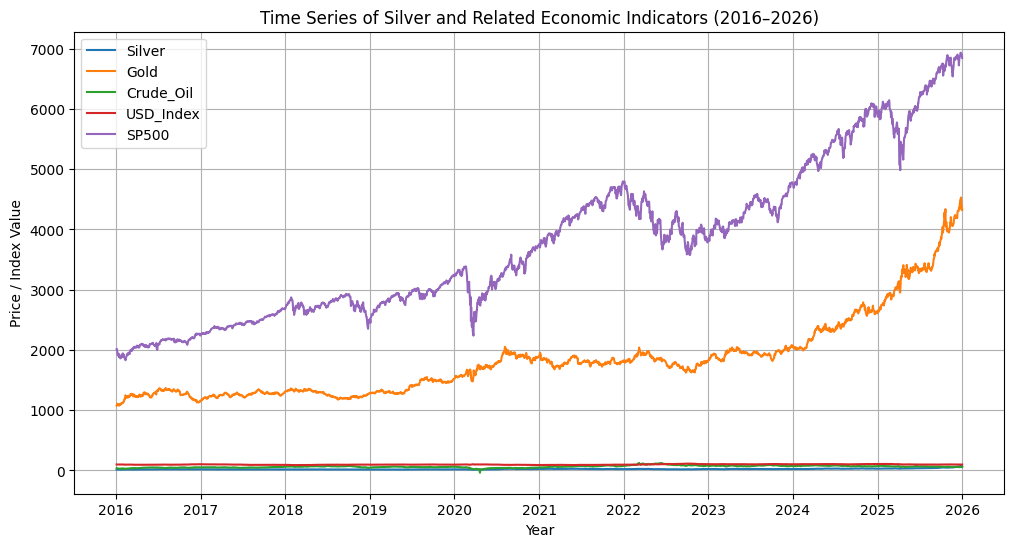

In [16]:
# Time Series Plots
plt.figure(figsize=(12, 6))
for col in df.columns:
    plt.plot(df.index, df[col], label=col)

plt.legend()
plt.title("Time Series of Silver and Related Economic Indicators (2016–2026)")
plt.xlabel("Year")
plt.ylabel("Price / Index Value")
plt.grid(True)
plt.show()

Time-Series Plot (Sliver Close Price)

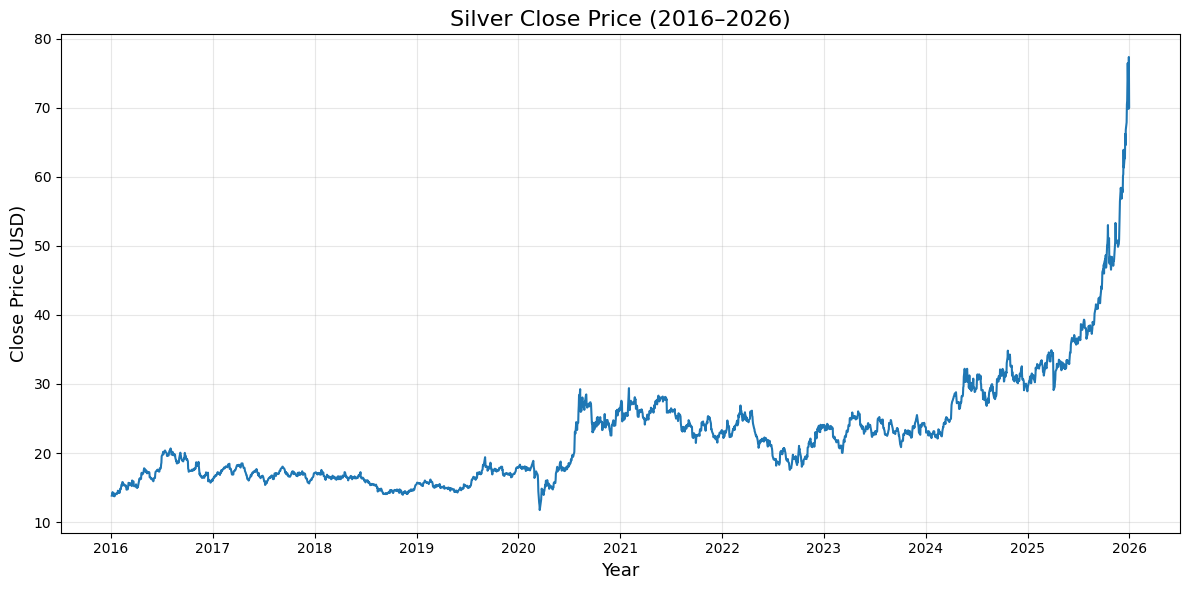

In [8]:
# Silver Price Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Date", y="Silver",linewidth=1.5)
plt.title("Silver Close Price (2016–2026)", fontsize=16)
plt.xlabel("Year", fontsize=13)
plt.ylabel("Close Price (USD)", fontsize=13)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


Correlation Matrix

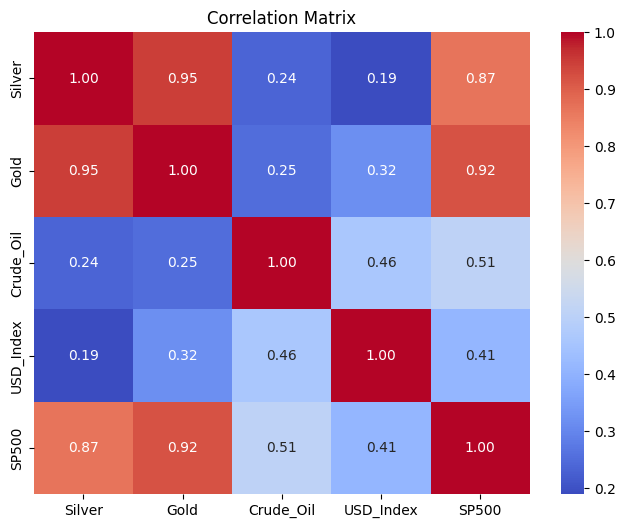

In [9]:

plt.figure(figsize=(8, 6))
corr_matrix = df.corr()

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

The correlation analysis reveals a strong positive relationship between silver and gold prices (r = 0.95), confirming their co-movement as precious metals. Silver also shows a strong association with equity markets (S&P 500, r = 0.87), reflecting sensitivity to market sentiment. In contrast, crude oil and the US dollar index exhibit weaker linear correlations, suggesting that their influence on silver prices may be indirect or lag-dependent. These findings justify the inclusion of all variables in a multivariate modelling framework, particularly when using deep learning models capable of capturing non-linear temporal dependencies.

Distribution Plots

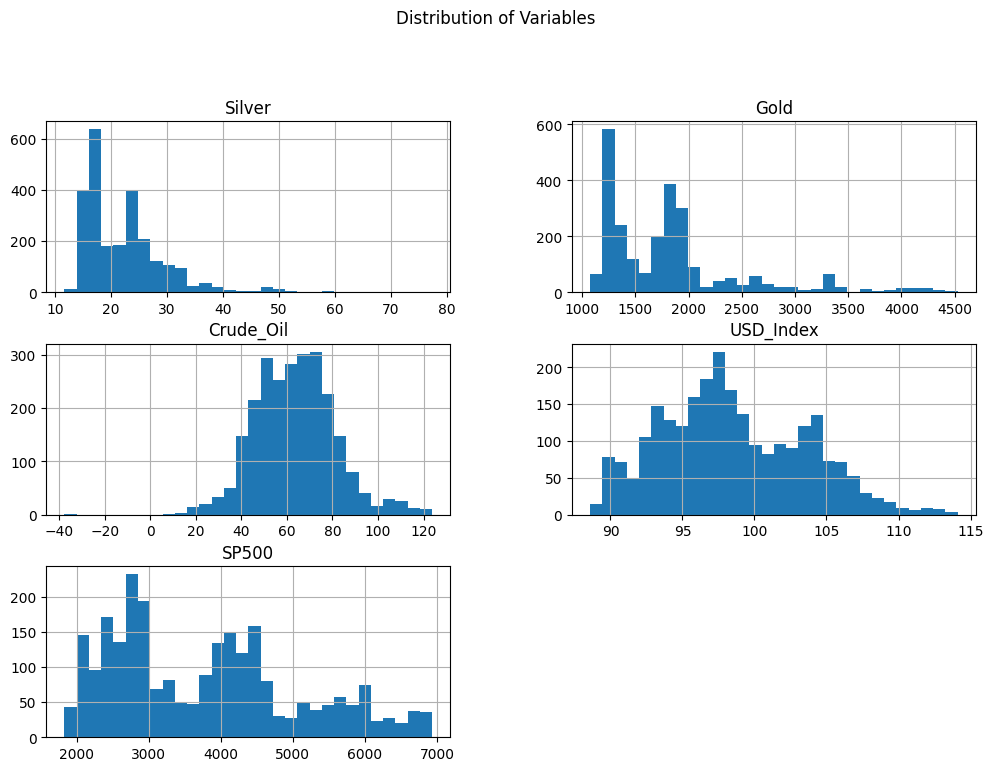

In [10]:
df.hist(bins=30, figsize=(12, 8))
plt.suptitle("Distribution of Variables", y=1.02)
plt.show()

Distribution Analysis (2016–2026):
The histograms indicate that all variables exhibit non-normal, skewed distributions, which is typical for financial time-series data. Silver and gold prices show right-skewness due to long-term upward trends and market shocks after 2020. Crude oil displays high volatility with a wide spread, reflecting extreme price fluctuations during economic disruptions. The USD Index remains relatively stable with moderate dispersion, while the S&P 500 shows a broad distribution driven by sustained market growth. These distributional characteristics justify the use of scaling and deep learning models capable of handling non-linear and non-Gaussian data.


Boxplots (Outlier Detection)

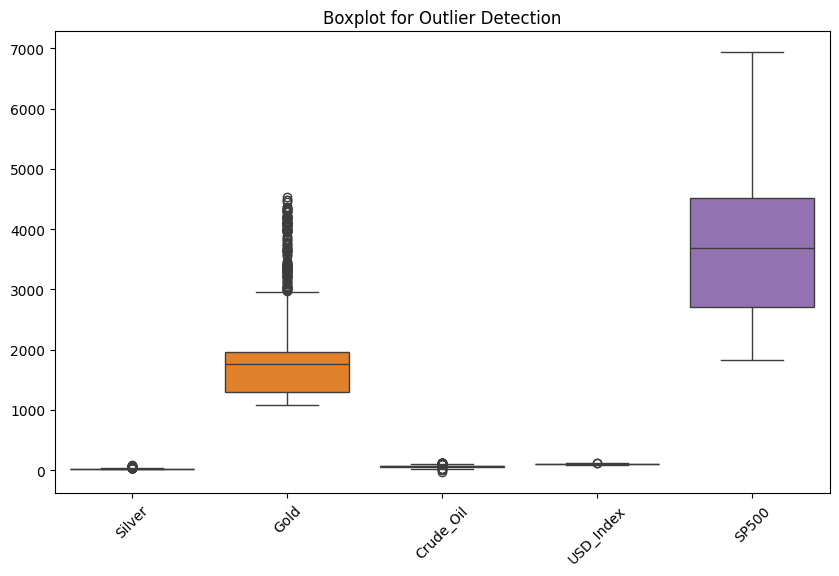

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title("Boxplot for Outlier Detection")
plt.xticks(rotation=45)
plt.show()

Boxplot Analysis:  
The boxplots reveal the presence of extreme values across all variables, reflecting genuine market volatility and long-term price trends rather than data errors. Precious metals and equity indices show wider spreads due to sustained growth, while crude oil exhibits higher variability driven by economic shocks. No outliers were removed, as these values represent real financial behavior in time-series data.


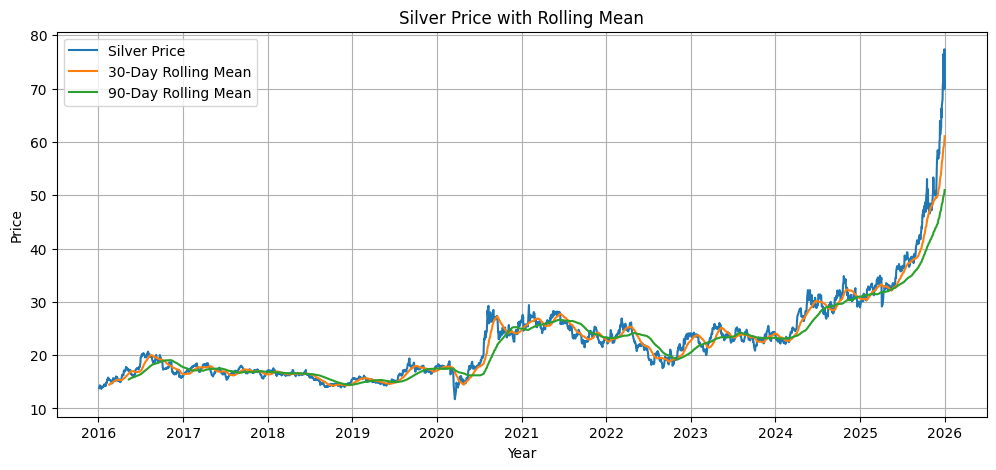

In [13]:
# Rolling Mean for Trend Analysis (Silver)
plt.figure(figsize=(12, 5))
plt.plot(df["Silver"], label="Silver Price")
plt.plot(df["Silver"].rolling(window=30).mean(), label="30-Day Rolling Mean")
plt.plot(df["Silver"].rolling(window=90).mean(), label="90-Day Rolling Mean")

plt.legend()
plt.title("Silver Price with Rolling Mean")
plt.xlabel("Year")
plt.ylabel("Price")
plt.grid(True)
plt.show()

Silver Price Distribution & Silver Boxplot

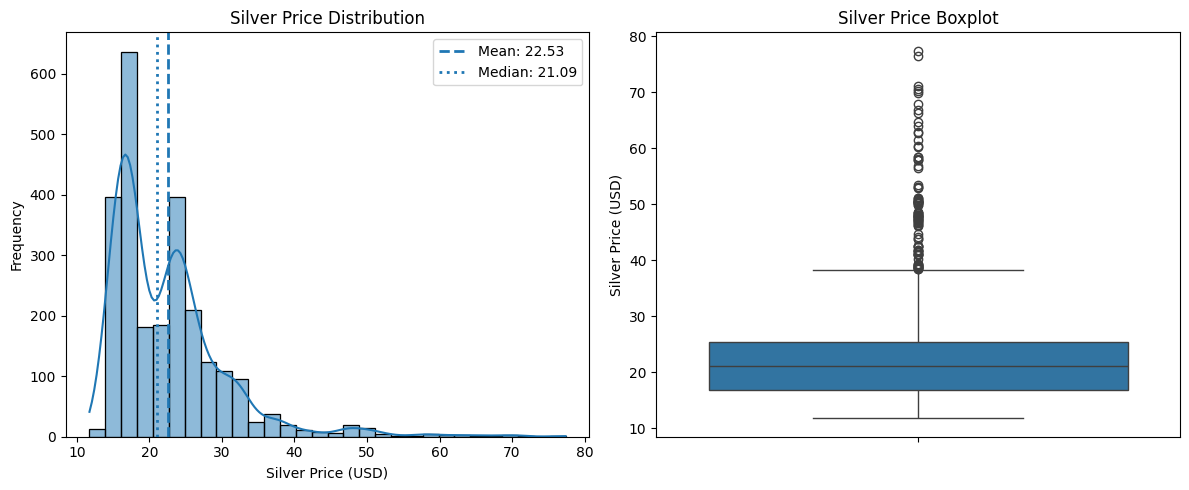

In [14]:
# Silver series
silver = df["Silver"]

# Mean and Median
mean_val = silver.mean()
median_val = silver.median()

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))


# Silver Price Distribution

sns.histplot(silver, bins=30, kde=True, ax=ax[0])
ax[0].axvline(mean_val, linestyle='--', linewidth=2, label=f"Mean: {mean_val:.2f}")
ax[0].axvline(median_val, linestyle=':', linewidth=2, label=f"Median: {median_val:.2f}")

ax[0].set_title("Silver Price Distribution")
ax[0].set_xlabel("Silver Price (USD)")
ax[0].set_ylabel("Frequency")
ax[0].legend()


# Silver Boxplot

sns.boxplot(y=silver, ax=ax[1])
ax[1].set_title("Silver Price Boxplot")
ax[1].set_ylabel("Silver Price (USD)")

plt.tight_layout()
plt.show()


The distribution of silver prices is right-skewed, with the mean exceeding the median, indicating the influence of upward trends and price spikes after 2020. The boxplot shows increased dispersion and the presence of extreme values, which reflect genuine market volatility rather than data anomalies.


Yearly Average Silver Price Bar Chart

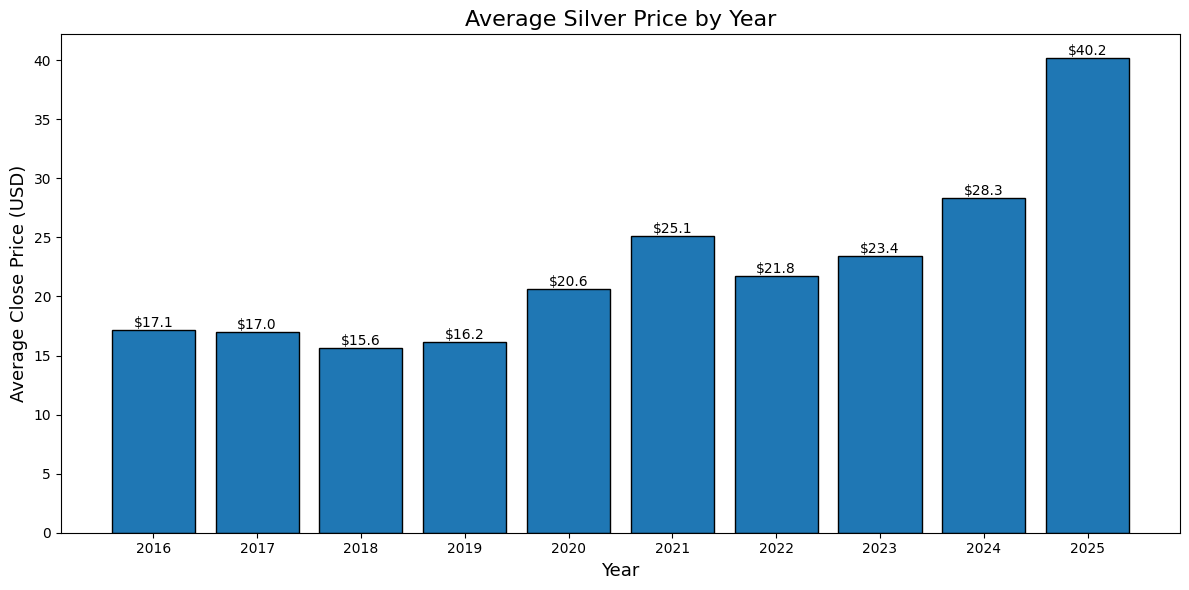

In [15]:
import matplotlib.pyplot as plt

# Create Year column
df_year = df.copy()
df_year["Year"] = df_year.index.year

# Calculate yearly mean Silver price
yearly_silver_mean = df_year.groupby("Year")["Silver"].mean()

# Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(
    yearly_silver_mean.index,
    yearly_silver_mean.values,
    edgecolor="black"
)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"${height:.1f}",
        ha="center",
        va="bottom",
        fontsize=10
    )

plt.title("Average Silver Price by Year", fontsize=16)
plt.xlabel("Year", fontsize=13)
plt.ylabel("Average Close Price (USD)", fontsize=13)
plt.xticks(yearly_silver_mean.index)
plt.tight_layout()
plt.show()


The year-wise average silver price shows a stable pattern before 2020, followed by a significant upward shift. The post-2020 increase reflects heightened market volatility and changing macroeconomic conditions, indicating a structural change in silver price dynamics.
